In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_data=pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
combine_data[combine_data.city=='Amandaburgh']


,city,driver_count,type,date,fare,ride_id
1520,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1521,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421
1526,Amandaburgh,12,Urban,2018-03-20 07:40:33,27.45,3701008274871
1527,Amandaburgh,12,Urban,2018-04-01 09:24:21,24.29,1995462170530
1528,Amandaburgh,12,Urban,2018-04-20 02:16:07,16.27,3513123734716
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674


## Bubble Plot of Ride Sharing Data

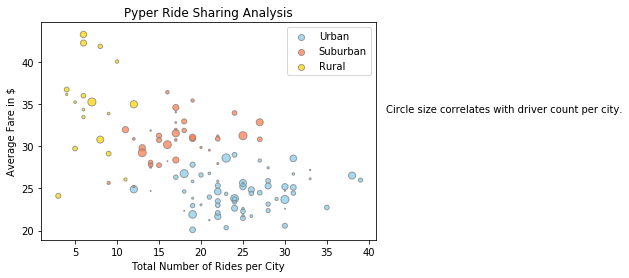

In [22]:
# Obtain the x and y coordinates for each of the three city types
urban = combine_data[(combine_data["type"]=="Urban")]
suburban = combine_data[(combine_data["type"]=="Suburban")]
rural =combine_data[( combine_data["type"]=="Rural")]

urban_avg= urban.groupby("city")["fare"].mean()
suburban_avg= suburban.groupby("city")["fare"].mean()
rural_avg= rural.groupby("city")["fare"].mean()

urban_total= urban.groupby("city")["fare"].count()
suburban_total= suburban.groupby("city")["fare"].count()
rural_total= rural.groupby("city")["fare"].count()

totaldrivers= city_data.groupby("city")["driver_count"].sum()
totaldrivers
# Build the scatter plots for each city types

urban_plot = plt.scatter(urban_total, urban_avg, s=totaldrivers, alpha=.75, c='SkyBlue', edgecolor= 'grey')

suburban_plot=plt.scatter(suburban_total, suburban_avg, s=totaldrivers, alpha=.75,c= 'Coral',edgecolor= 'grey')

rural_plot = plt.scatter(rural_total, rural_avg, s=totaldrivers,alpha=.75, c='Gold', edgecolor='grey')
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare in $")
plt.title("Pyper Ride Sharing Analysis")

# Create a legend
plt.legend(handles=[urban_plot,suburban_plot,rural_plot], labels=['Urban', 'Suburban', 'Rural'])


# Incorporate a text label regarding circle size
plt.text(42,34,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyper_Ride_Sharing.png")
plt.show()

## Total Fares by City Type

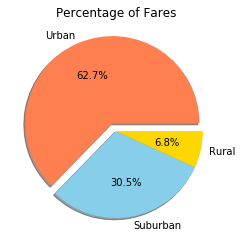

<Figure size 432x288 with 0 Axes>

In [15]:
# Calculate Type Percents
urbanfare=urban["fare"].sum()
suburbanfare=suburban["fare"].sum()
ruralfare=rural["fare"].sum()
# Build Pie Chart
totalfare =[urbanfare,suburbanfare,ruralfare]
explode = [.1,0,0]
labels =["Urban","Suburban","Rural"]
colors = ["coral","skyblue","gold"]
plt.pie(totalfare,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,explode=explode)
plt.title("Percentage of Fares")
plt.show()
# Save Figure
plt.savefig("Pyper_Percentage_Fares.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

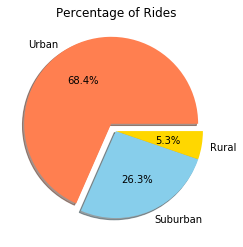

<Figure size 432x288 with 0 Axes>

In [18]:
# Calculate Ride Percents
urban_ride=urban["ride_id"].count()
suburban_ride=suburban["ride_id"].count()
rural_ride=rural["ride_id"].count()

# Build Pie Chart


totalfare =[urban_ride,suburban_ride,rural_ride]
explode = [.1,0,0]
labels =["Urban","Suburban","Rural"]
colors = ["coral","skyblue","gold"]
plt.pie(totalfare,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,explode=explode)
plt.title("Percentage of Rides")
plt.show()
# Save Figure

plt.savefig("Pyper_Percentage_Rides.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

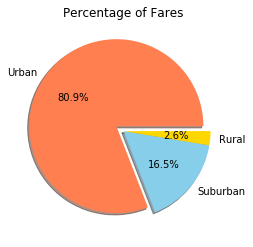

<Figure size 432x288 with 0 Axes>

In [29]:
# Calculate Driver Percents

urbandrivers=city_data.loc[city_data["type"]== "Urban", "driver_count"].sum()
suburbandrivers=city_data.loc[city_data["type"]== "Suburban", "driver_count"].sum()
ruraldrivers=city_data.loc[city_data["type"] == "Rural" , "driver_count"].sum()
# Build Pie Chart
totalfare =[urbandrivers,suburbandrivers,ruraldrivers]
explode = [.1,0,0]
labels =["Urban","Suburban","Rural"]
colors = ["coral","skyblue","gold"]
plt.pie(totalfare,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,explode=explode)
plt.title("Percentage of Fares")
plt.show()
# Build Pie Charts

# Save Figure
plt.savefig("Pyper_Percentage_drivers.png")


In [ ]:
# Show Figure
plt.show()

In [39]:
print("After looking at the data and conducting the analysis, its come to the conclusion that 
urban cities have more rides and higher profits then the counterparts. This is due to a number of reasons. There is a 
higher demand for ride sharing in the urban cities due to more population and closer proximity of buildings. For example 
if you take a look at a city like Austin, there will be higher amounts of people wanting to use ride share around downtown area 
then if you looked at Lampasas, Texas which is 70 miles north west of Austin.")
      
      
Another observation which can be seen from the scatterplot is that the rides are more expensive in the rural then 
the urban and suburban cities. This can be due to the distance that is traveled during the rides is longer. A pasanger might be 
taking a ride to the city or to a nearby town. At the same time if you look at the view there are fewer number of rides in the 
rural areas. This is due to the lower demand in these parts. From a businesss standpoint it would still be profitable to be in the city
then the outskirt areas because there would be more rides thus more income.")

SyntaxError: EOL while scanning string literal (<ipython-input-39-95afedc254a5>, line 1)